In [3]:
### Not in function
using PyPlot
using JLD
using Dates
using FFTW

include("Model_Reduction.jl")


vector_wiener_filter_fft

In [3]:
Data = load("Data\\KSE_sol_lin.jld")

Dict{String,Any} with 11 entries:
  "T"       => 100000
  "P"       => 21.55
  "h"       => 0.001
  "N"       => 96
  "dat_uu"  => [6.45435 6.7761 … 9.20009 9.16923; 4.92695 5.27089 … 8.24047 8.2…
  "g"       => "x -> cos(π*x/16)*(1 + sin.(π*x/16))"
  "T_disc"  => 50000
  "tm"      => 2020-07-27T14:08:55.979
  "obs_gap" => 100
  "dat_tt"  => [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9  …  49999.1, 4…
  "dat_vv"  => Complex{Float64}[0.672611+0.0im 0.672611+0.0im … 0.672611+0.0im …

In [4]:
uu = Data["dat_uu"]
vv = Data["dat_vv"]
tt = Data["dat_tt"]

h = Data["h"]
N = Data["N"]
P = Data["P"]
obs_gap = Data["obs_gap"]
Δt = h*obs_gap

t_start = 0
t_stop = 150
ind_start = floor(Int,t_start/Δt)+1
ind_stop =floor(Int,t_stop/Δt)

1500

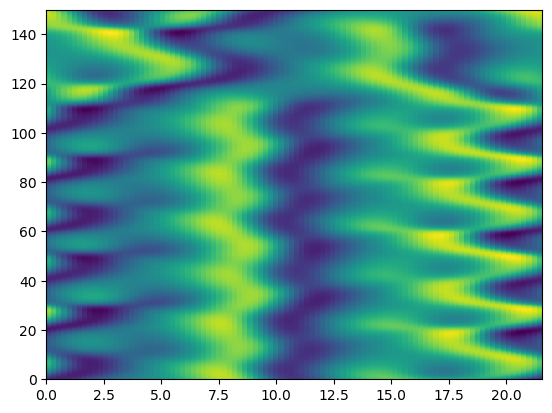

PyObject <matplotlib.image.AxesImage object at 0x000000004A4DEF88>

In [5]:
H1 = imshow(uu[:,ind_start:ind_stop]', extent=[0,21.55,0,150], aspect="auto")

### Autocov of $k=2$ mode

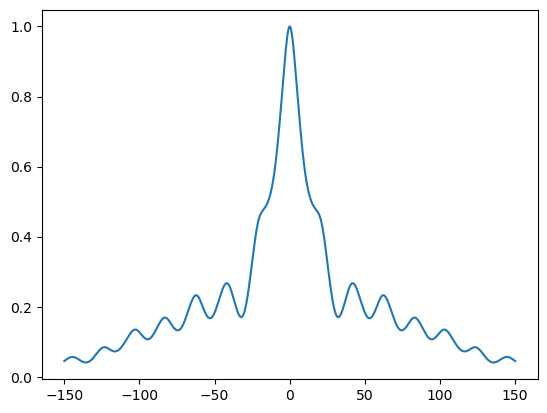

C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000005253DFC8>

In [25]:
v2 = vv[3,:]
lags = -1500:1500

A_v2 = my_crosscor(v2,v2,lags)
plot(lags*Δt,A_v2)

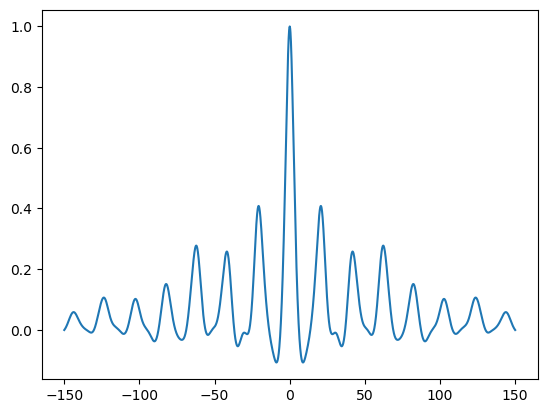

C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000488B4EC8>

In [7]:
v5 = vv[6,:]
lags = -1500:1500

A = my_crosscor(v5,v5,lags)
plot(lags*Δt,A)

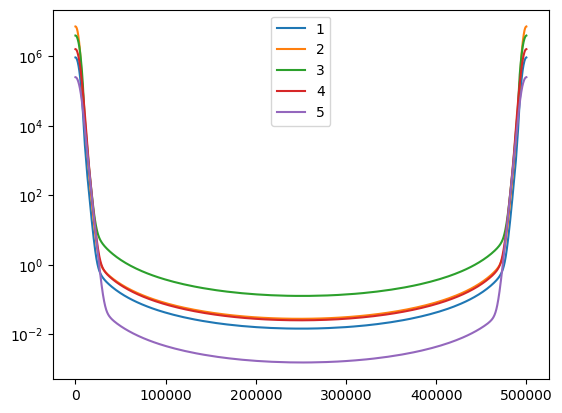

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


PyObject <matplotlib.legend.Legend object at 0x00000000624553C8>

In [17]:

for i = 1:5
    z_spect = z_spect_scalar(vv[1+i,:],n = 3, p = 2500)
    semilogy(z_spect, label = i)
end
legend()

In [28]:
z_spect2 = z_spect_scalar(vv[3,:],n = 3, p = 2500);

In [30]:
size(z_spect2)

(500001,)

In [31]:
nextfastfft(500001)

500094

In [2]:
z_spect2_c = ifft(z_spect2);

UndefVarError: UndefVarError: ifft not defined

In [1]:
A_z_spect2 = [(lag < 0 ? z_spect2_c[end+lag+1] : z_spect2_c[1+lag]) for lag in lags]/z_spect2_c[1];

UndefVarError: UndefVarError: lags not defined

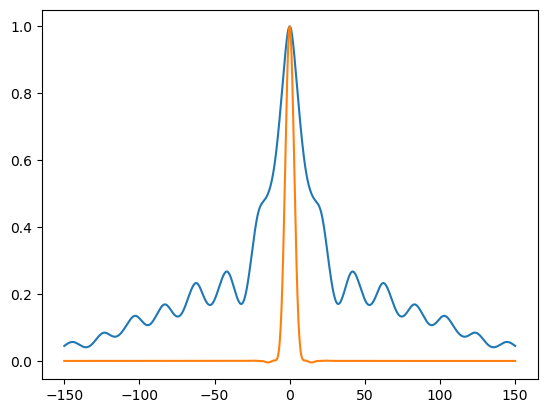

C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000062435E48>
 PyObject <matplotlib.lines.Line2D object at 0x000000006246B6C8>

In [26]:
plot(lags*Δt,[A_v2 A_z_spect2])